#  Factors Influencing ACT Scores

#  Machine Learning

Data source: https://www.cde.ca.gov/.

1. Unsupervised Learning
    - 1.1 Number of Clusters
    - 1.2 Elbow Method
    - 1.3 Silhouette Analysis
    - 1.4 K-Means Clustering
    - 1.5 Visualization of Clusters
2. Supervised Learning
    - 2.1 Preparing the Data
    - 2.2 Upsampling with Smote
    - 2.3 Target and Features
    - 2.4 Confusion Matrix
    - 2.5 Logistic Regression
    - 2.6 KNeigbors Classifier
    - 2.7 DecisionTree Classifier
    - 2.8 Ensemble Methods
        - 2.8.1 Voting
        - 2.8.2 Bagging
        - 2.8.3 RandomForest Classifier
        - 2.8.4 XGBoost

   In the first section of the machine learning analysis, I approach the problem as an unsupervised learning problem. Using K-Means Clustering method on the average ACT scores from each section (English, Math, Reading, Science), I want to obtain classes that group the schools based on their ACT scores. To choose the best number of clusters I use the elbow method and the Silhoutte analysis. <br>
   In the second section, I approach the problem as a supervised learning problem. The classes obtained from the first section constitutes the labeled target. Using the other  features in the data such as the percentage of the students who comes from different ethnic  backgrounds, the percentage of students who receive reduced and free meals, whether a school is public or charter, I try different machine learning algorithms  to place  the schools into the groups which were created based on the success level. 


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.pipeline  import make_pipeline
from folium.plugins import MarkerCluster
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [2]:
# Setting options to display all column and row names
pd.options.display.max_columns=None
pd.options.display.max_rows=None

In [3]:
sns.set_style("whitegrid")
sns.set_context("notebook", font_scale=1.25)

In [4]:
data = pd.read_csv('ml_data.csv')

In [5]:
data.columns

Index(['Year', 'CDS_CODE', 'COUNTY', 'DISTRICT', 'SCHOOL', 'Charter',
       'Latitude', 'Longitude', 'Enroll12', 'NumTstTakr', 'AvgScrEng',
       'AvgScrRead', 'AvgScrMath', 'AvgScrSci', 'NumGE21', 'PctGE21',
       '(%)FRPM', 'American Indian or Alaska Native', 'Asian',
       'Pacific Islander', 'Filipino', 'Hispanic or Latino',
       'African American', 'White', 'Two or More Races', 'AvgScr'],
      dtype='object')

In [6]:
data.head()

,Year,CDS_CODE,COUNTY,DISTRICT,SCHOOL,Charter,Latitude,Longitude,Enroll12,NumTstTakr,AvgScrEng,AvgScrRead,AvgScrMath,AvgScrSci,NumGE21,PctGE21,(%)FRPM,American Indian or Alaska Native,Asian,Pacific Islander,Filipino,Hispanic or Latino,African American,White,Two or More Races,AvgScr
0,2014,1100170112607,Alameda,Alameda County Office of Education,Envision Academy for Arts & Technology,Y,37.804520,-122.26815,48.0,18.0,16.0,15.0,17.0,16.0,1.0,5.56,77.259475,0.041667,0.000000,0.000000,0.000000,0.395833,0.541667,0.000000,0.020833,16.0
1,2014,1100170118489,Alameda,Alameda County Office of Education,Aspire California College Preparatory Academy,Y,37.868991,-122.27844,51.0,25.0,18.0,17.0,19.0,18.0,7.0,28.00,66.086957,0.000000,0.019608,0.000000,0.039216,0.705882,0.235294,0.000000,0.000000,18.0
2,2014,1316170131763,Alameda,California School for the Deaf-Fremont (State ...,California School for the Deaf-Fremont,N,37.558956,-121.96551,76.0,23.0,14.0,15.0,15.0,14.0,1.0,4.35,99.752475,0.000000,0.105263,0.013158,0.039474,0.460526,0.144737,0.223684,0.013158,14.5
3,2014,1611190106401,Alameda,Alameda Unified,Alameda Science and Technology Institute,N,37.780753,-122.27930,41.0,20.0,26.0,26.0,27.0,25.0,17.0,85.00,23.529412,0.000000,0.487805,0.000000,0.000000,0.195122,0.097561,0.219512,0.000000,26.0
4,2014,1611190130229,Alameda,Alameda Unified,Alameda High,N,37.764958,-122.24593,428.0,114.0,25.0,24.0,25.0,24.0,94.0,82.46,22.831561,0.000000,0.469626,0.007009,0.088785,0.105140,0.044393,0.280374,0.004673,24.5


In [7]:
len(data['SCHOOL'].unique())

1191

# 1. Unsupervised Learning

## 1.1. Number of Clusters

In [8]:
def best_clusters(data):
    X = np.matrix(data.values)

    ks = range(2, 11)
    inertias = []

    for k in ks:
        # Create a KMeans instance with k clusters: model
        model = KMeans(n_clusters=k, random_state=1)

        # Fit model to samples
        model.fit(X)

        # Append the inertia to the list of inertias
        inertias.append(model.inertia_)
        
    # Plot ks vs inertias
    fig = plt.figure(figsize=(10,7))
    plt.plot(ks, inertias, '-o')
    plt.title('Number of clusters vs SSE')
    plt.xlabel('Number of clusters, k')
    plt.ylabel('Sum of squared distance')
    plt.xticks(ks)
    plt.show()
    
def pipeline(k, data):
    X = np.matrix(data.values)
    kmeans = KMeans(n_clusters = k, random_state=1)
    pipeline =  make_pipeline(kmeans)
    labels = pipeline.fit_predict(X)
    data['cluster'] = labels
    

## 1.2. Elbow Method

Elbow method gives us an idea on what a good k number of clusters would be based on the sum of squared distance (SSE) between data points and their assigned clusters’ centroids. This method generates a plot of the sum of squared distances for k in a specified range . If the plot looks like an arm, then the elbow on the arm is optimal k.
<br>
The graph below shows that k= 3 or 4 might not be a bad choice. It’s still hard to figure out a good number of clusters to use, because the curve is monotonically decreasing and not showing a good elbow point or has an obvious point where the curve starts flattening out. 

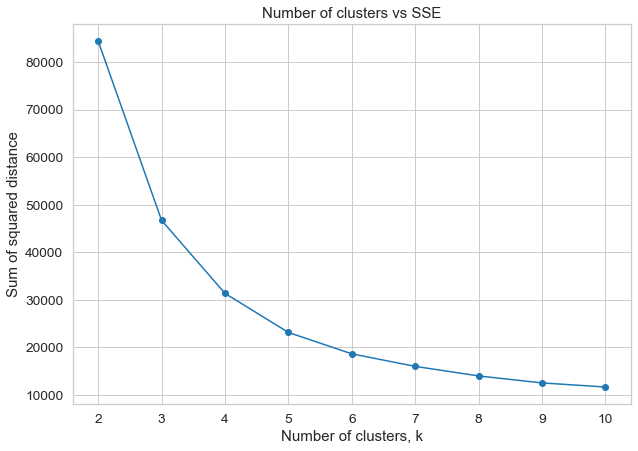

In [9]:
df = data[['AvgScrEng','AvgScrRead', 'AvgScrMath', 'AvgScrSci']]
# calling the best_clusters function 
best_clusters(df)

## 1.3. Silhouette Analysis

Another method to find the number of clusters is Silhouette anlysis. Silhouette analysis can be used to determine the degree of separation between clusters. The silhouette plot displays a measure of how close each point in one cluster is to points in the neighboring clusters and thus provides a way to assess parameters like number of clusters visually. This measure has a range of [-1, 1]. Silhouette coefficients near +1 indicate that the sample is far away from the neighboring clusters.<br>
In the elbow method, the number of clusters we picked was 3 or 4. Here, I am applying the Silhouette method to pick the best k among 3, 4 and 5. Looking at the silhoutte coefficients and the graphs below, the best pick for k would be 3. When k=3, Silhouette coefficient is 0.48 which is the highest among the other scores.

Silhouette coefficient for k = 3 is 0.48410185397926714
Silhouette coefficient for k = 4 is 0.44570787291610436
Silhouette coefficient for k = 5 is 0.42669153420237527


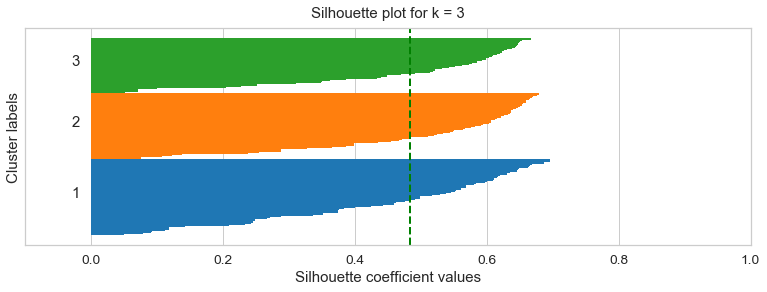

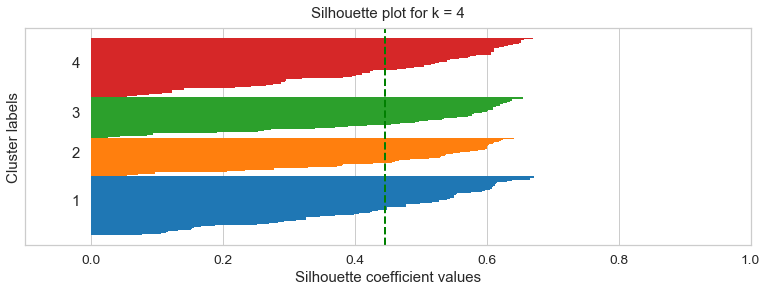

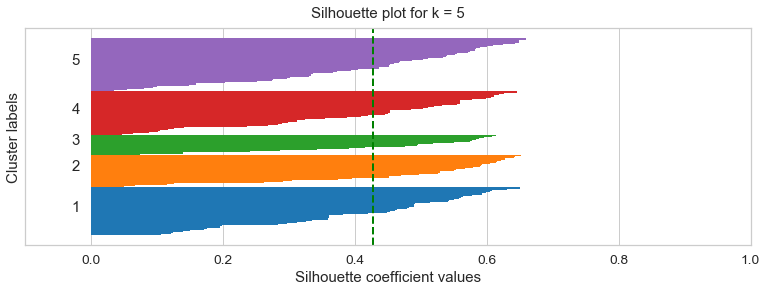

In [10]:
from sklearn.metrics import silhouette_samples, silhouette_score

for i, k in enumerate([3, 4, 5]):

    fig = plt.figure(figsize=(13,4))
    
    # Run the Kmeans algorithm
    km = KMeans(n_clusters=k, random_state=1)
    labels = km.fit_predict(df)
    centroids = km.cluster_centers_

    # Get silhouette samples
    silhouette_vals = silhouette_samples(df, labels)

    # Silhouette plot
    y_ticks = []
    y_lower, y_upper = 0, 0
    for i, cluster in enumerate(np.unique(labels)):
        cluster_silhouette_vals = silhouette_vals[labels == cluster]
        cluster_silhouette_vals.sort()
        y_upper += len(cluster_silhouette_vals)
        plt.barh(range(y_lower, y_upper), cluster_silhouette_vals, edgecolor='none', height=1)
        plt.text(-0.03, (y_lower + y_upper) / 2, str(i + 1))
        y_lower += len(cluster_silhouette_vals)

    # Get the average silhouette score and plot it
    avg_score = np.mean(silhouette_vals)
    plt.axvline(avg_score, linestyle='--', linewidth=2, color='green')
    plt.yticks([])
    plt.xlim([-0.1, 1])
    plt.xlabel('Silhouette coefficient values')
    plt.ylabel('Cluster labels')
    plt.title(f'Silhouette plot for k = {k}', y=1.02)
    print('Silhouette coefficient for k = {} is {}'. format(k, avg_score))

## 1.4. K-Means Clustering

In [11]:
# calling the pipeline function 
pipeline(3, df)

/Users/meralbalik/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [12]:
# visualizing the cluster points in each section
X = np.matrix(data[['AvgScrEng','AvgScrRead', 'AvgScrMath', 'AvgScrSci']].values)
model = KMeans(n_clusters=3, random_state=1)
model.fit(X)

# calculating the cluster  centers for each subject test
centroids = model.cluster_centers_
centroids_e = centroids[:,0]
centroids_r = centroids[:,1]
centroids_m = centroids[:,2]
centroids_s = centroids[:,3]
centroids

array([[20.8881323 , 21.85262646, 21.57392996, 21.13229572],
       [16.40866185, 17.66240977, 18.094392  , 17.55469184],
       [25.54099462, 25.80040323, 25.56586022, 24.73790323]])

In the above cell, I've summarized the cluster centers. The first column represent the cluster centers for average English scores for each cluster. The second column is for Reading scores, third and fourth column is for Math and Science scores respectively. For example, for English scores, the centroid of the class 0 is 20.88, the centroid of the class 1 is 16.40,  and finally the centroid of the class 2 is 25.54. <br>

In [13]:
# adding a clomun to the original data showing the clusters
data['cluster'] = df['cluster']
data['Success']= data['cluster'].map({0: 'Medium', 1: 'Low', 2: 'High'})

data.head()

,Year,CDS_CODE,COUNTY,DISTRICT,SCHOOL,Charter,Latitude,Longitude,Enroll12,NumTstTakr,AvgScrEng,AvgScrRead,AvgScrMath,AvgScrSci,NumGE21,PctGE21,(%)FRPM,American Indian or Alaska Native,Asian,Pacific Islander,Filipino,Hispanic or Latino,African American,White,Two or More Races,AvgScr,cluster,Success
0,2014,1100170112607,Alameda,Alameda County Office of Education,Envision Academy for Arts & Technology,Y,37.804520,-122.26815,48.0,18.0,16.0,15.0,17.0,16.0,1.0,5.56,77.259475,0.041667,0.000000,0.000000,0.000000,0.395833,0.541667,0.000000,0.020833,16.0,1,Low
1,2014,1100170118489,Alameda,Alameda County Office of Education,Aspire California College Preparatory Academy,Y,37.868991,-122.27844,51.0,25.0,18.0,17.0,19.0,18.0,7.0,28.00,66.086957,0.000000,0.019608,0.000000,0.039216,0.705882,0.235294,0.000000,0.000000,18.0,1,Low
2,2014,1316170131763,Alameda,California School for the Deaf-Fremont (State ...,California School for the Deaf-Fremont,N,37.558956,-121.96551,76.0,23.0,14.0,15.0,15.0,14.0,1.0,4.35,99.752475,0.000000,0.105263,0.013158,0.039474,0.460526,0.144737,0.223684,0.013158,14.5,1,Low
3,2014,1611190106401,Alameda,Alameda Unified,Alameda Science and Technology Institute,N,37.780753,-122.27930,41.0,20.0,26.0,26.0,27.0,25.0,17.0,85.00,23.529412,0.000000,0.487805,0.000000,0.000000,0.195122,0.097561,0.219512,0.000000,26.0,2,High
4,2014,1611190130229,Alameda,Alameda Unified,Alameda High,N,37.764958,-122.24593,428.0,114.0,25.0,24.0,25.0,24.0,94.0,82.46,22.831561,0.000000,0.469626,0.007009,0.088785,0.105140,0.044393,0.280374,0.004673,24.5,2,High


## 1.5.  Visualization of Clusters

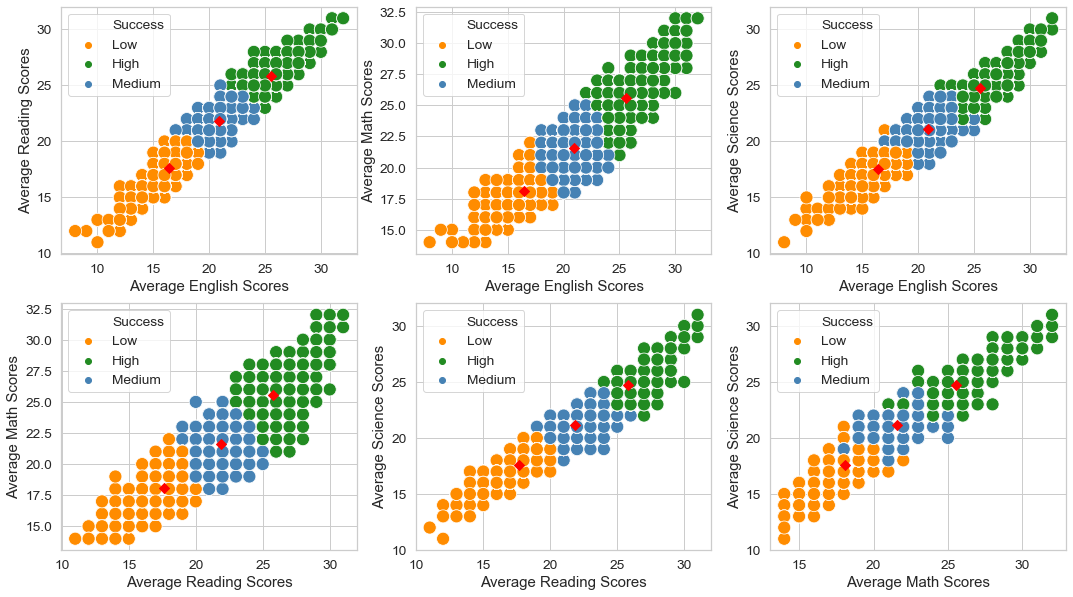

In [14]:
fig = plt.figure(figsize=(18, 10))

color_dict = dict({'Medium':'steelblue','Low':'darkorange','High': 'forestgreen'})

plt.subplot(2, 3, 1)
sns.scatterplot(x=data['AvgScrEng'], y=data['AvgScrRead'], hue=data['Success'], s=170, palette=color_dict)
plt.scatter(centroids_e, centroids_r, marker= 'D',s=50, color='red')
plt.xlabel('Average English Scores')
plt.ylabel('Average Reading Scores')

plt.subplot(2, 3, 2)
sns.scatterplot(x=data['AvgScrEng'], y=data['AvgScrMath'], hue=data['Success'],s=170, palette=color_dict)
plt.scatter(centroids_e, centroids_m, marker= 'D',s=50, color='red')
plt.xlabel('Average English Scores')
plt.ylabel('Average Math Scores')

plt.subplot(2, 3, 3)
sns.scatterplot(x=data['AvgScrEng'], y=data['AvgScrSci'], hue=data['Success'], s=170, palette=color_dict)
plt.scatter(centroids_e, centroids_s, marker= 'D',s=50, color='red')
plt.xlabel('Average English Scores')
plt.ylabel('Average Science Scores')

plt.subplot(2, 3, 4)
sns.scatterplot(x=data['AvgScrRead'], y=data['AvgScrMath'], hue=data['Success'], s=170, palette=color_dict)
plt.scatter(centroids_r, centroids_m, marker= 'D',s=50, color='red')
plt.xlabel('Average Reading Scores')
plt.ylabel('Average Math Scores')

plt.subplot(2, 3, 5)
sns.scatterplot(x=data['AvgScrRead'], y=data['AvgScrSci'], hue=data['Success'], s=170, palette=color_dict)
plt.scatter(centroids_r, centroids_s, marker= 'D',s=50, color='red')
plt.xlabel('Average Reading Scores')
plt.ylabel('Average Science Scores')

plt.subplot(2, 3, 6)
sns.scatterplot(x=data['AvgScrMath'], y=data['AvgScrSci'], hue=data['Success'], s=170, palette=color_dict)
plt.scatter(centroids_m, centroids_s, marker= 'D',s=50, color='red')
plt.xlabel('Average Math Scores')
plt.ylabel('Average Science Scores')


plt.show()


In [15]:
# Grouping the schools based on their cluster number
sch0 = data[data['Success'] == 'Low'][['SCHOOL', 'Latitude', 'Longitude']]

sch1 = data[data['Success'] == 'Medium'][['SCHOOL', 'Latitude', 'Longitude']]

sch2 = data[data['Success'] == 'High'][['SCHOOL', 'Latitude', 'Longitude']]

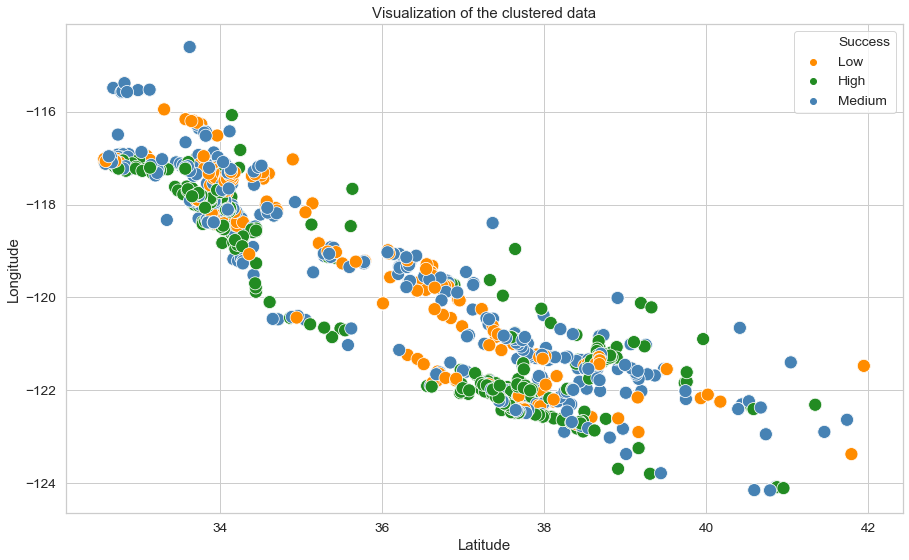

In [16]:
# showing all the schools based on their locations
fig = plt.figure(figsize=(15,9))
plt.title("Visualization of the clustered data")
sns.scatterplot(x=data['Latitude'], y=data['Longitude'], hue=data['Success'],
                s=170, palette=color_dict)
plt.show()

In the graph above, we can see the distribution of the schools based on their clusters or success levels. It is hard to find a specific pattern looking at the schools' locations. So in the next section, I am creating horizantal bar graphs that show the number of  schools in each county grouped by their success levels. 

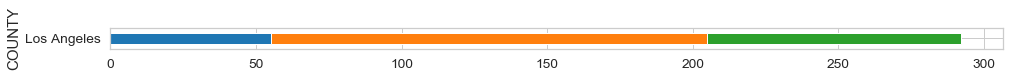

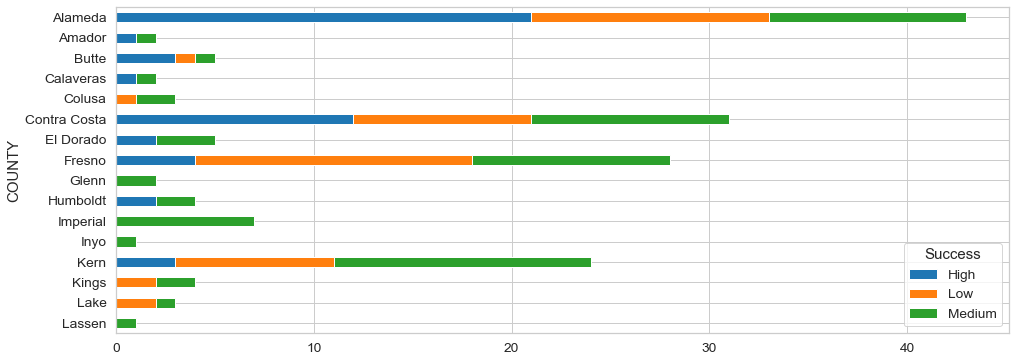

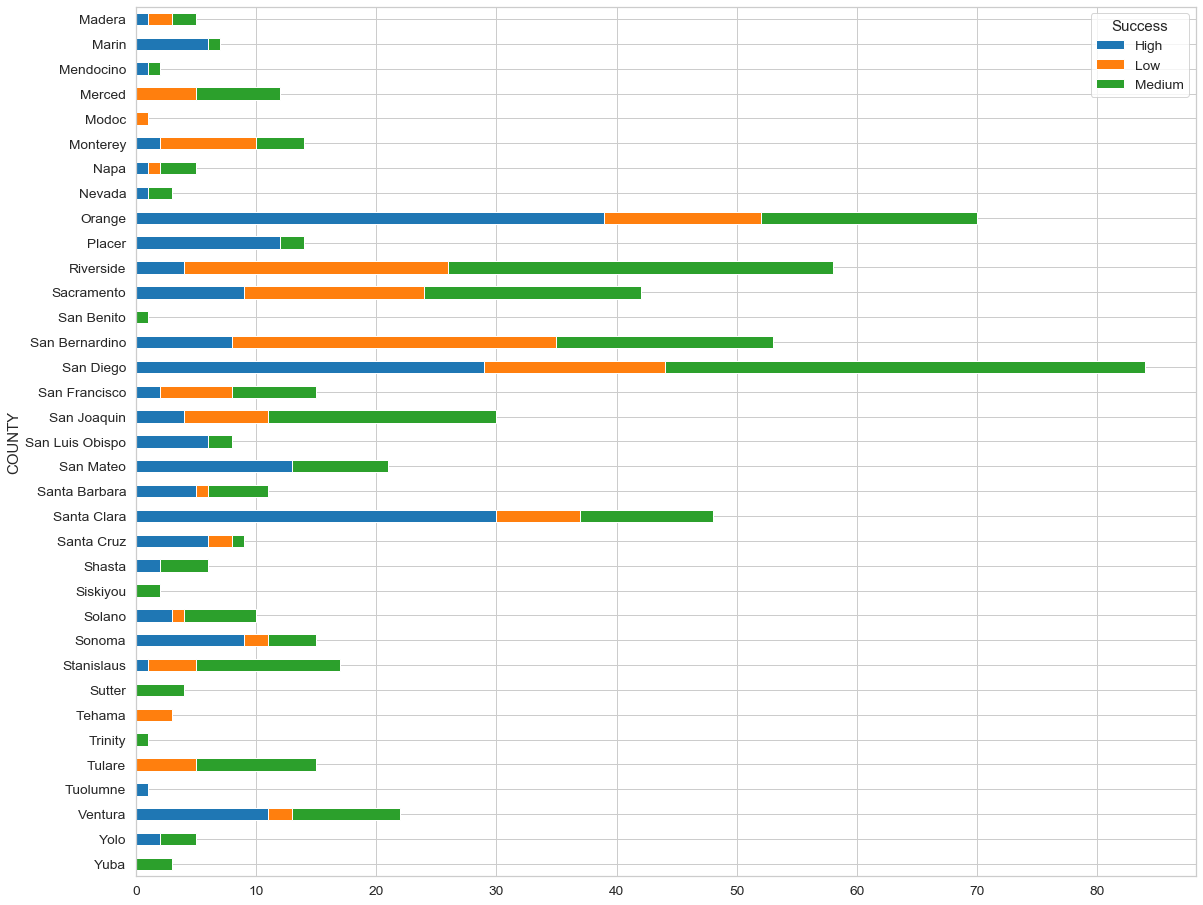

In [17]:
sch_cls = data[data['Year']==2018]
sch_cls = sch_cls.groupby(['COUNTY', 'Success']).size().unstack()
sch_cls[sch_cls.index=='Los Angeles'].plot(kind='barh', stacked=True, figsize=(16,0.4))
plt.legend().remove()
plt.gca().invert_yaxis()
sch_cls[:16].plot(kind='barh', stacked=True, figsize=(16,6))
plt.gca().invert_yaxis()
sch_cls[17:].plot(kind='barh', stacked=True, figsize=(19,16))
plt.gca().invert_yaxis()

In the above graph, there are some counties which have high percentage of orange color meaning that they contain more schools with low success. Below, I pull up some of those counties to take a closer look. 

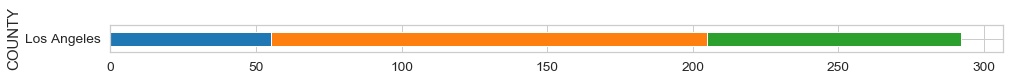

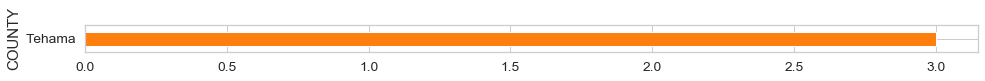

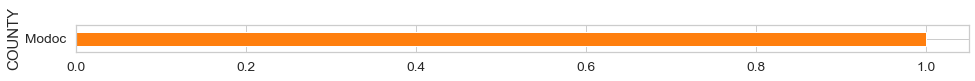

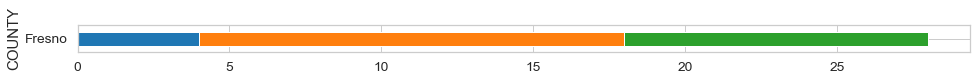

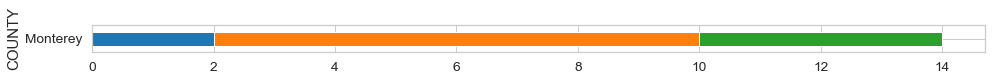

In [18]:
counties = ['Los Angeles','Tehama','Modoc','Fresno','Monterey' ]

for county in counties:
    sch_cls[sch_cls.index == county].plot(kind='barh', stacked=True, figsize=(16,0.5))
    plt.legend().remove() 

One of the counties with high percentage of schools with low success level is Los Angeles. In Tehama, three of the schools are again in the low success level group. 

In [19]:
data[data['COUNTY']=='Tehama']

,Year,CDS_CODE,COUNTY,DISTRICT,SCHOOL,Charter,Latitude,Longitude,Enroll12,NumTstTakr,AvgScrEng,AvgScrRead,AvgScrMath,AvgScrSci,NumGE21,PctGE21,(%)FRPM,American Indian or Alaska Native,Asian,Pacific Islander,Filipino,Hispanic or Latino,African American,White,Two or More Races,AvgScr,cluster,Success
1028,2014,52715065231709,Tehama,Corning Union High,Corning High,N,39.935147,-122.17251,222.0,55.0,19.0,20.0,19.0,19.0,20.0,36.36,75.055188,0.013514,0.004505,0.000000,0.000000,0.495495,0.000000,0.463964,0.009009,19.25,1,Low
1029,2014,52715715235106,Tehama,Los Molinos Unified,Los Molinos High,N,40.021194,-122.09626,47.0,21.0,17.0,19.0,19.0,19.0,6.0,28.57,76.165803,0.000000,0.000000,0.000000,0.000000,0.446809,0.000000,0.510638,0.042553,18.50,1,Low
1030,2014,52716395237201,Tehama,Red Bluff Joint Union High,Red Bluff High,N,40.176327,-122.24712,325.0,70.0,23.0,25.0,24.0,23.0,48.0,68.57,56.559140,0.033846,0.006154,0.000000,0.003077,0.240000,0.018462,0.673846,0.024615,23.75,2,High
2068,2015,52715065231709,Tehama,Corning Union High,Corning High,N,39.935147,-122.17251,230.0,74.0,19.0,20.0,20.0,20.0,30.0,40.54,73.140954,0.017391,0.008696,0.000000,0.004348,0.473913,0.017391,0.460870,0.004348,19.75,0,Medium
2069,2015,52715715235106,Tehama,Los Molinos Unified,Los Molinos High,N,40.021194,-122.09626,37.0,41.0,17.0,19.0,20.0,18.0,10.0,24.39,78.089888,0.000000,0.000000,0.000000,0.000000,0.621622,0.000000,0.378378,0.000000,18.50,1,Low
2070,2015,52716395237201,Tehama,Red Bluff Joint Union High,Red Bluff High,N,40.176327,-122.24712,334.0,235.0,18.0,19.0,20.0,19.0,90.0,38.30,58.671096,0.020958,0.005988,0.002994,0.005988,0.260479,0.008982,0.664671,0.026946,19.00,1,Low
3152,2016,52715065231709,Tehama,Corning Union High,Corning High,N,39.935147,-122.17251,189.0,103.0,17.0,19.0,19.0,19.0,32.0,31.07,69.266055,0.005291,0.005291,0.010582,0.000000,0.544974,0.000000,0.433862,0.000000,18.50,1,Low
3153,2016,52715715235106,Tehama,Los Molinos Unified,Los Molinos High,N,40.021194,-122.09626,39.0,40.0,15.0,16.0,17.0,16.0,4.0,10.00,68.208092,0.000000,0.000000,0.025641,0.000000,0.512821,0.025641,0.410256,0.025641,16.00,1,Low
3154,2016,52716395237201,Tehama,Red Bluff Joint Union High,Red Bluff High,N,40.176327,-122.24712,331.0,219.0,18.0,19.0,19.0,19.0,80.0,36.53,56.237357,0.036254,0.003021,0.000000,0.000000,0.247734,0.012085,0.649547,0.051360,18.75,1,Low
4218,2017,52715065231709,Tehama,Corning Union High,Corning High,N,39.935147,-122.17251,190.0,84.0,17.0,18.0,17.0,17.0,19.0,22.62,69.281768,0.000000,0.000000,0.000000,0.005263,0.510526,0.010526,0.442105,0.010526,17.25,1,Low


In [20]:
data[data['SCHOOL']=='Red Bluff High']

,Year,CDS_CODE,COUNTY,DISTRICT,SCHOOL,Charter,Latitude,Longitude,Enroll12,NumTstTakr,AvgScrEng,AvgScrRead,AvgScrMath,AvgScrSci,NumGE21,PctGE21,(%)FRPM,American Indian or Alaska Native,Asian,Pacific Islander,Filipino,Hispanic or Latino,African American,White,Two or More Races,AvgScr,cluster,Success
1030,2014,52716395237201,Tehama,Red Bluff Joint Union High,Red Bluff High,N,40.176327,-122.24712,325.0,70.0,23.0,25.0,24.0,23.0,48.0,68.57,56.559140,0.033846,0.006154,0.000000,0.003077,0.240000,0.018462,0.673846,0.024615,23.75,2,High
2070,2015,52716395237201,Tehama,Red Bluff Joint Union High,Red Bluff High,N,40.176327,-122.24712,334.0,235.0,18.0,19.0,20.0,19.0,90.0,38.30,58.671096,0.020958,0.005988,0.002994,0.005988,0.260479,0.008982,0.664671,0.026946,19.00,1,Low
3154,2016,52716395237201,Tehama,Red Bluff Joint Union High,Red Bluff High,N,40.176327,-122.24712,331.0,219.0,18.0,19.0,19.0,19.0,80.0,36.53,56.237357,0.036254,0.003021,0.000000,0.000000,0.247734,0.012085,0.649547,0.051360,18.75,1,Low
4220,2017,52716395237201,Tehama,Red Bluff Joint Union High,Red Bluff High,N,40.176327,-122.24712,369.0,257.0,18.0,19.0,19.0,19.0,89.0,34.63,57.825802,0.032520,0.005420,0.000000,0.000000,0.262873,0.013550,0.644986,0.040650,18.75,1,Low
5297,2018,52716395237201,Tehama,Red Bluff Joint Union High,Red Bluff High,N,40.176327,-122.24712,345.0,265.0,17.0,18.0,18.0,18.0,74.0,27.92,58.463542,0.028986,0.008696,0.000000,0.011594,0.295652,0.008696,0.620290,0.026087,17.75,1,Low


In [21]:
data[data['COUNTY']=='Modoc']

,Year,CDS_CODE,COUNTY,DISTRICT,SCHOOL,Charter,Latitude,Longitude,Enroll12,NumTstTakr,AvgScrEng,AvgScrRead,AvgScrMath,AvgScrSci,NumGE21,PctGE21,(%)FRPM,American Indian or Alaska Native,Asian,Pacific Islander,Filipino,Hispanic or Latino,African American,White,Two or More Races,AvgScr,cluster,Success
491,2014,25735934737250,Modoc,Tulelake Basin Joint Unified,Tulelake High,N,41.948868,-121.47648,40.0,18.0,19.0,20.0,20.0,20.0,7.0,38.89,76.712329,0.0,0.0,0.0,0.0,0.475000,0.0,0.425000,0.050000,19.75,0,Medium
2608,2016,25735934737250,Modoc,Tulelake Basin Joint Unified,Tulelake High,N,41.948868,-121.47648,35.0,17.0,19.0,20.0,19.0,19.0,7.0,41.18,72.850679,0.0,0.0,0.0,0.0,0.657143,0.0,0.342857,0.000000,19.25,1,Low
3683,2017,25735934737250,Modoc,Tulelake Basin Joint Unified,Tulelake High,N,41.948868,-121.47648,35.0,18.0,18.0,21.0,18.0,19.0,5.0,27.78,65.853659,0.0,0.0,0.0,0.0,0.714286,0.0,0.285714,0.000000,19.00,1,Low
4754,2018,25735934737250,Modoc,Tulelake Basin Joint Unified,Tulelake High,N,41.948868,-121.47648,30.0,23.0,16.0,18.0,17.0,19.0,4.0,17.39,65.555556,0.0,0.0,0.0,0.0,0.666667,0.0,0.300000,0.033333,17.50,1,Low


#  2. Supervised Learning

## 2.1. Preparing the Data

In [22]:
# Changing the 'Charter' column to numerical values
data['Charter'] = data['Charter'].replace('Y', 1)
data['Charter'] = data['Charter'].replace('N', 0)

After creating classes with unsupervised learning techniques, I visualized the distribution of the classes by creating a categorical graph showing the number of schools in each class. Number of schools in one class is less than the others. This might be a problem, because the classifier learns the classes with more samples better and remain weak on the smaller classes.
In the next section, I am going to use SMOTE technique to balance the number of schools in each class.

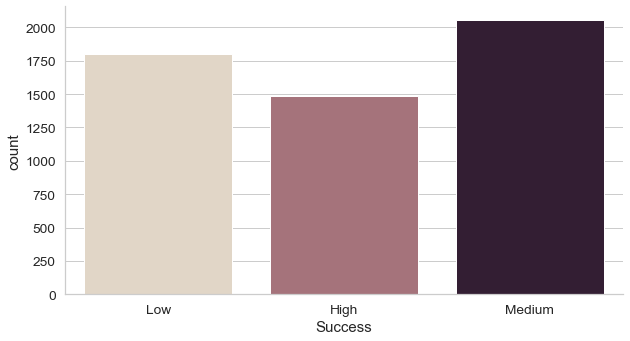

In [23]:
# plotting the number of schools in each success level category
_ = sns.catplot(x='Success', kind="count",  palette="ch:.25", data=data, height=5, aspect=1.75)

## 2.2. Upsampling with SMOTE

SMOTE (Synthetic Minority Oversampling Technique) consists of synthesizing elements for the minority class, based on those that already exist. It works randomly picking a point from the minority class and computing the k-nearest neighbors for this point. The synthetic points are added between the chosen point and its neighbors.

In [24]:
from imblearn.over_sampling import SMOTE
from collections import Counter

# determining the target and the features to be used in models
df = data[['Year','Charter', '(%)FRPM', 'American Indian or Alaska Native', 'Asian', 
               'Pacific Islander', 'Filipino', 'Hispanic or Latino', 'African American', 
               'White', 'Two or More Races', 'Success']]

X = df.loc[:, df.columns != 'Success']
y = df.Success

sm = SMOTE(sampling_strategy='auto', k_neighbors=1, random_state=1)
X_res, y_res = sm.fit_resample(X, y)

# summarize the new class distribution
counter = Counter(y_res)
print('Number of data points in each cluster:', counter)

Using TensorFlow backend.


Number of data points in each cluster: Counter({'Low': 2056, 'High': 2056, 'Medium': 2056})


In [25]:
# converting X_res and y_res numpy arays back to data frames 
columns_X = ['Year','Charter', '(%)FRPM', 'American Indian or Alaska Native', 'Asian', 
               'Pacific Islander', 'Filipino', 'Hispanic or Latino', 'African American', 
               'White', 'Two or More Races']
columns_y =['Success']

# pass in array and columns
X = pd.DataFrame(X_res, columns=columns_X)
y = pd.DataFrame(y_res, columns=columns_y)

df = pd.concat([X, y], axis=1)
print(df.shape)

(6168, 12)


## 2.3. Target  and Features

With the data prepared, I create a train and a test dataset. I’ll use the train set to build and validate the model, and treat the test set as the unseen new data. The training data will cover the data for the years from 2014 to 2017 and the test data will be the data for the year 2018.

In [26]:
# determining the target and the features to be used in models
features = df[['Charter', '(%)FRPM', 'American Indian or Alaska Native', 'Asian', 
               'Pacific Islander', 'Filipino', 'Hispanic or Latino', 'African American', 
               'White', 'Two or More Races', 'Success']]

features_train = features[df.Year !=2018]
features_test = features[df.Year ==2018]

X_train = features_train.drop('Success', axis=1).values
y_train = features_train['Success'].values

X_test = features_test.drop('Success', axis=1).values 
y_test = features_test['Success'].values

## 2.4. Confusion Matrix

A confusion matrix is a technique for summarizing the performance of a classification algorithm.
Classification accuracy alone can be misleading if there is an unequal number of observations in each class or if there are more than two classes in your dataset. Calculating a confusion matrix can give a better idea of what the classification model is getting right and what types of errors it is making.

While trying to find the best model, I also observe the confusion matrix for each of the models to show the correct and incorrect predictions for each class.

In [27]:
# creating a function that plots the confusion matrix
def conf_matrix(conf_mat):
    labels = ['High', 'Low', 'Medium']
    ax=sns.heatmap(conf_mat,xticklabels=labels,yticklabels=labels,
                   annot=True,fmt='d',cmap="Blues",cbar=True)
    ax.set_xlim(-0.1, len(np.unique(y))-0.1)
    ax.set_ylim(len(np.unique(y))-0.01, -0.01)
    ax.set_title('Confusion Matrix')
    ax.set_ylabel('Actual')
    ax.set_xlabel('Predicted');

## 2.5. Logistic Regression

Logistic regression is one of the most popular supervised classification algorithm. This classification algorithm mostly used for solving binary classification problems. Logistic regression algorithm can also use to solve the multi-classification problems. So in this section, I implement the logistic regression model in python for the multi-classification problem using OneVsRestClassifier.

In [28]:
from sklearn.pipeline  import make_pipeline
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier

# creating a pipeline
pl_lgr = Pipeline([('scaler', StandardScaler()),
               ('lgr', OneVsRestClassifier(LogisticRegression(solver='lbfgs', max_iter=150, random_state=1)))])

pl_lgr.fit(X_train, y_train)
accuracy_lgr = pl_lgr.score(X_test, y_test)
y_pred_lgr = pl_lgr.predict(X_test)

print('Accuracy score on train set:', accuracy_score(y_train, pl_lgr.predict(X_train)))
print('Accuracy score on test set:', accuracy_lgr)

Accuracy score on train set: 0.7675741568468102
Accuracy score on test set: 0.7495987158908507


The model is performing almost similar on both training and the test sets. We can say that the model neither overfitting nor underfitting.

              precision    recall  f1-score   support

        High       0.83      0.85      0.84       431
         Low       0.72      0.92      0.81       401
      Medium       0.67      0.48      0.56       414

    accuracy                           0.75      1246
   macro avg       0.74      0.75      0.74      1246
weighted avg       0.74      0.75      0.74      1246



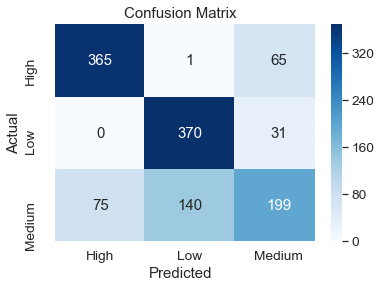

In [29]:
# applying the confusion matrix
conf_lgr = confusion_matrix(y_test, y_pred_lgr)

# calling the confusion matrix    
conf_matrix(conf_lgr)

print(classification_report(y_test, y_pred_lgr))

In the confusion matrix shown above, rows indicate how many 'High', 'Low' and 'Medium' classes were predicted correctly and how many of them were missclassifeid. The higher the diagonal values of the confusion matrix the better, indicating many correct predictions.

For example, there are 401 points in the second row, the model was successful in predicting 370 of those correctly as a 'Low' class, but 31 were marked as 'Medium' class. There are a number of misclassifications in the 'Medium' class.

## 2.6. KNeighbors Classifier

In [30]:
from sklearn.model_selection import GridSearchCV
# Tune hyperparameters in KNN classifier using GridSearchCV
# Setup the hyperparameter grid
param_grid = {'n_neighbors': np.arange(1,20)}

# Instantiate the GridSearchCV object
grid_kN = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)

# Fit to training data
grid_kN.fit(X_train, y_train)

# Print the tuned parameters and score
print("Tuned KNeighborsClassifier Parameters: {}".format(grid_kN.best_params_))
print("Best CV score is {}".format(grid_kN.best_score_))

Tuned KNeighborsClassifier Parameters: {'n_neighbors': 12}
Best CV score is 0.7513206013815522


In [31]:
# fitting the kN model with best parameters
steps = [('scaler', StandardScaler()),
         ('kN', OneVsRestClassifier(KNeighborsClassifier(n_neighbors=7)))]

pl_kN1 = Pipeline(steps)
pl_kN1.fit(X_train, y_train)
accuracy_kN1 = pl_kN1.score(X_test, y_test)

print('Accuracy score on train set:', accuracy_score(y_train, pl_kN1.predict(X_train)))
print('Accuracy score on test set:', accuracy_kN1)

Accuracy score on train set: 0.8531084924827306
Accuracy score on test set: 0.7945425361155698


Since the model has a high score on training data and a lower score on the test data, the model is slightly overfitting. Below I change the number of neighbors to 35 and I reduced the difference between the scores for train and test sets.

In [32]:
# fitting the kN model with adjusted parameters
steps = [('scaler', StandardScaler()),
         ('kN', OneVsRestClassifier(KNeighborsClassifier(n_neighbors=35)))]

pl_kN = Pipeline(steps)
pl_kN.fit(X_train, y_train)
accuracy_kN = pl_kN.score(X_test, y_test)
y_pred_kN = pl_kN.predict(X_test)

print('Accuracy score on train set:', accuracy_score(y_train, pl_kN.predict(X_train)))
print('Accuracy score on test set:', accuracy_kN)

Accuracy score on train set: 0.7945956928078017
Accuracy score on test set: 0.7768860353130016


              precision    recall  f1-score   support

        High       0.86      0.82      0.84       431
         Low       0.79      0.88      0.83       401
      Medium       0.68      0.64      0.66       414

    accuracy                           0.78      1246
   macro avg       0.77      0.78      0.77      1246
weighted avg       0.78      0.78      0.78      1246



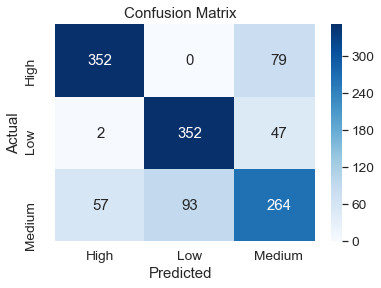

In [33]:
# applying the confusion matrix
conf_kN = confusion_matrix(y_test, y_pred_kN)

# calling the confusion matrix    
conf_matrix(conf_kN)

# printing the classification report
print(classification_report(y_test, y_pred_kN))

## 2.7. Decision Tree Classifier

In [34]:
# Tune hyperparameters in decision tree classifier using GridSearchCV
# Setup the parameters and distributions to sample from: param_grid

param_grid = {"max_depth": [3, 5, 7],
              "max_features": [1,2,3,4],
              "min_samples_leaf": [0.1,1,2],
              "criterion": ["gini", "entropy"]}

# Instantiate the GridSearchCV object
grid_cv = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5)

# Fit to training data
grid_cv.fit(X_train, y_train)

# Print the tuned parameters and score
print("Tuned Decision Tree Parameters: {}".format(grid_cv.best_params_))
print("Best CV score is {}".format(grid_cv.best_score_))

Tuned Decision Tree Parameters: {'criterion': 'gini', 'max_depth': 5, 'max_features': 4, 'min_samples_leaf': 2}
Best CV score is 0.7663551401869159


In [35]:
# fitting the DecisionTreeClassifier with best parameters

# creating a pipeline
steps = [('dt1', DecisionTreeClassifier(criterion= 'gini', max_depth= 7, 
                                        max_features= 4, min_samples_leaf= 2, random_state=1))]

pl_dt1 = Pipeline(steps)
pl_dt1.fit(X_train, y_train)
accuracy_dt1 = pl_dt1.score(X_test, y_test)

print('Accuracy score on train set:', accuracy_score(y_train, pl_dt1.predict(X_train)))
print('Accuracy score on test set:', accuracy_dt1)

Accuracy score on train set: 0.8159284843559529
Accuracy score on test set: 0.7383627608346709


Since the model has a high score on training data and a lower score on the test data, the model is slightly overfitting. Below I change the parameters to reduce the difference between the scores.

In [36]:
# fitting the DecisionTreeClassifier with adjusted parameters
steps = [('dt', DecisionTreeClassifier(criterion= 'gini', max_depth= 5, max_features= 4,
                                       min_samples_leaf= 10, random_state=1))]

pl_dt = Pipeline(steps)
pl_dt.fit(X_train, y_train)
accuracy_dt = pl_dt.score(X_test, y_test)
y_pred_dt = pl_dt.predict(X_test)

print('Accuracy score on train set:', accuracy_score(y_train, pl_dt.predict(X_train)))
print('Accuracy score on test set:', accuracy_dt)

Accuracy score on train set: 0.7878911011783828
Accuracy score on test set: 0.7568218298555377


              precision    recall  f1-score   support

        High       0.83      0.84      0.84       431
         Low       0.75      0.88      0.81       401
      Medium       0.68      0.55      0.61       414

    accuracy                           0.76      1246
   macro avg       0.75      0.76      0.75      1246
weighted avg       0.75      0.76      0.75      1246



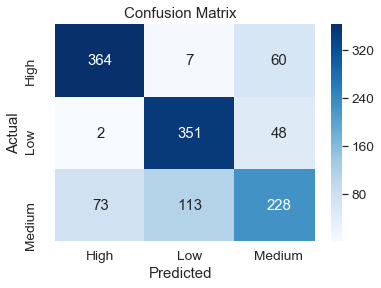

In [37]:
# applying the confusion matrix y_pred_dt = pl_dt.predict(X_test)
conf_dt = confusion_matrix(y_test, y_pred_dt)

# calling the confusion matrix    
conf_matrix(conf_dt)

# printing the classification report
print(classification_report(y_test, y_pred_dt))

## 2. 8. Ensemble Methods

## 2.8.1. Voting

In [38]:
# defining a list that contains the tuples (classifier name, classifier)
classifiers = [('Logistic Regression', pl_lgr),
               ('KNeighbors Classiffier', pl_kN),
               (' Decision Tree Classifier', pl_dt)]
print('Accuracy score for Logistic Regression model:', accuracy_lgr)
print('Accuracy score for KNeighbors model:', accuracy_kN)
print('Accuracy score for Decision Tree model:', accuracy_dt)

Accuracy score for Logistic Regression model: 0.7495987158908507
Accuracy score for KNeighbors model: 0.7768860353130016
Accuracy score for Decision Tree model: 0.7568218298555377


In [39]:
from sklearn.ensemble import VotingClassifier
# Instantiate voting classifier
vc = VotingClassifier(estimators=classifiers)

# Fit 'vc' to training data and predict on test data
vc.fit(X_train, y_train)
y_pred_vc = vc.predict(X_test)
accuracy_vc = vc.score(X_test, y_test)
y_pred_vc = vc.predict(X_test)

# Evaluate the accuracy of voting classifier on train and test data
print('Accuracy score on train set:', accuracy_score(y_train, vc.predict(X_train)))
print('Accuracy score on test set:', accuracy_vc)

Accuracy score on train set: 0.7954083705810646
Accuracy score on test set: 0.7728731942215088


              precision    recall  f1-score   support

        High       0.85      0.84      0.84       431
         Low       0.77      0.90      0.83       401
      Medium       0.69      0.58      0.63       414

    accuracy                           0.77      1246
   macro avg       0.77      0.77      0.77      1246
weighted avg       0.77      0.77      0.77      1246



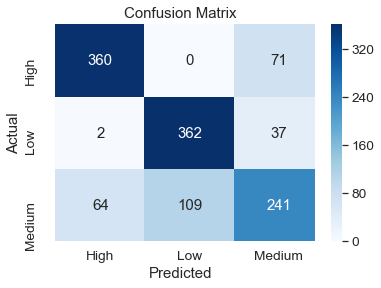

In [40]:
# applying the confusion matrix 
conf_vc = confusion_matrix(y_test, y_pred_vc)

# calling the confusion matrix    
conf_matrix(conf_vc)

# printing the classification report
print(classification_report(y_test, y_pred_vc))

## 2.8.2. Bagging

In [41]:
from sklearn.ensemble import BaggingClassifier

lgr = OneVsRestClassifier(LogisticRegression(solver='lbfgs', max_iter=300))
kN = OneVsRestClassifier(KNeighborsClassifier(n_neighbors=35))
clf = [lgr, kN]
for item in clf:
    # Instantiate a bagging classifier for decision tree
    steps = [('bag', OneVsRestClassifier(BaggingClassifier(base_estimator = item)))]

    pl_bag = Pipeline(steps)
    pl_bag.fit(X_train, y_train)
    accuracy_bag = pl_bag.score(X_test, y_test)

    # Evaluate the accuracy of voting classifier on train and test data
    print('Accuracy score on train set:', accuracy_score(y_train, pl_bag.predict(X_train)))
    print('Accuracy score on test set:', accuracy_bag)
    y_pred_dt = pl_dt.predict(X_test)

Accuracy score on train set: 0.7572125152377083
Accuracy score on test set: 0.7415730337078652
Accuracy score on train set: 0.7519301097114994
Accuracy score on test set: 0.7311396468699839


In bagging model, I used logistic regression and kNeighbors models as a base estimator. They both gave about the same accuracy score. I didn't use Decision Tree classifier, because this model seems to be slightly overestimating compared to the other models.

              precision    recall  f1-score   support

        High       0.87      0.72      0.79       431
         Low       0.75      0.84      0.79       401
      Medium       0.59      0.63      0.61       414

    accuracy                           0.73      1246
   macro avg       0.74      0.73      0.73      1246
weighted avg       0.74      0.73      0.73      1246



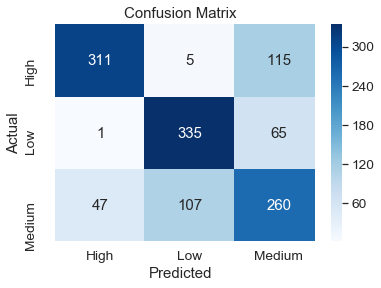

In [42]:
# applying the confusion matrix y_pred_dt = pl_dt.predict(X_test)
pl_bag = Pipeline([('bag', OneVsRestClassifier(BaggingClassifier(base_estimator = kN)))]).fit(X_train, y_train).predict(X_test)
conf_bag = confusion_matrix(y_test, pl_bag)

# calling the confusion matrix    
conf_matrix(conf_bag)

# printing the classification report
print(classification_report(y_test, pl_bag))

## 2.8.3. Random Forest Classifier

In [43]:
from sklearn.ensemble import RandomForestClassifier
steps = [('rf', RandomForestClassifier(n_estimators=100, max_depth= 5, max_features= 3,
                                       min_samples_leaf= 1, random_state=1))]

pl_rf = Pipeline(steps)
pl_rf.fit(X_train, y_train)
accuracy_rf = pl_rf.score(X_test, y_test)
y_pred_rf = pl_rf.predict(X_test)
# Evaluate the accuracy of Random Forest classifier on train and test data
print('Accuracy score on train set:', accuracy_score(y_train, pl_rf.predict(X_train)))
print('Accuracy score on test set:', accuracy_rf)

Accuracy score on train set: 0.8067858594067452
Accuracy score on test set: 0.7688603531300161


              precision    recall  f1-score   support

        High       0.88      0.79      0.83       431
         Low       0.79      0.85      0.82       401
      Medium       0.65      0.66      0.66       414

    accuracy                           0.77      1246
   macro avg       0.77      0.77      0.77      1246
weighted avg       0.77      0.77      0.77      1246



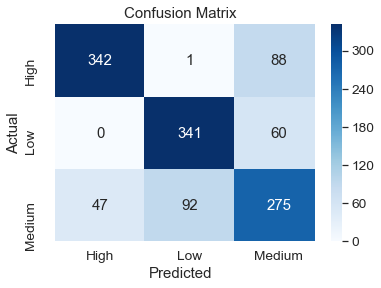

In [44]:
# applying the confusion matrix 
conf_rf = confusion_matrix(y_test, y_pred_rf)

# calling the confusion matrix    
conf_matrix(conf_rf)

# printing the classification report
print(classification_report(y_test, y_pred_rf))

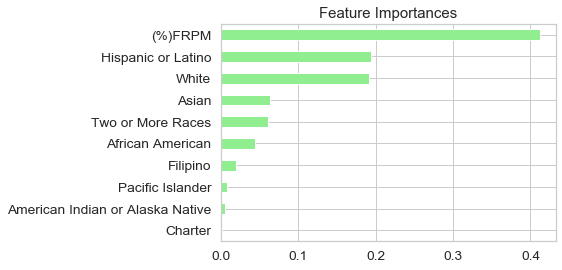

In [45]:
rf = RandomForestClassifier(n_estimators=100, max_depth= 5, max_features= 3,
                                       min_samples_leaf= 1, random_state=1)
rf.fit(X_train, y_train)

# Create series of the features importances and sort the values
importances = pd.Series(rf.feature_importances_, index=['Charter', '(%)FRPM', 'American Indian or Alaska Native', 'Asian', 
               'Pacific Islander', 'Filipino', 'Hispanic or Latino', 'African American', 
               'White', 'Two or More Races']).sort_values()

# Visualize the ranked importance of the features in a horizontal bar plot

importances.plot(kind='barh', color='lightgreen')
plt.title('Feature Importances')
plt.show();

In each node in a decision tree, data is split based on the feature to maximize the information gain in a node. We want to determine which attribute in a given set of training feature vectors is most useful for discriminating between the classes to be learned. The feature importances represent how much including a particular variable improves the prediction. The graph above tells us the best predictor of success level of a school is the percentage of the students who receive free and reduced priced meals. The second most important factor is the percentage of Hispanic students. It's followed by the percentage of White and Asian students. Whether the school is public or charter has no effect on the success level of a school.
In future implementations of the model, we can remove those variables that have no importance and the performance will not suffer. 

In [46]:
from sklearn.ensemble import RandomForestClassifier
steps = [('rf', RandomForestClassifier(n_estimators=10, max_depth= 5, max_features= 3,
                                       min_samples_leaf= 1, random_state=1))]

pl_rf = Pipeline(steps)
pl_rf.fit(X_train, y_train)
accuracy_rf = pl_rf.score(X_test, y_test)
y_pred_rf = pl_rf.predict(X_test)
# Evaluate the accuracy of Random Forest classifier on train and test data
print('Accuracy score on train set:', accuracy_score(y_train, pl_rf.predict(X_train)))
print('Accuracy score on test set:', accuracy_rf)

Accuracy score on train set: 0.8053636733035352
Accuracy score on test set: 0.7688603531300161


## 2.8.4. XGBoost

In [47]:
import xgboost as xgb

xgb = xgb.XGBClassifier(random_state=1)
# Fit the classifier to the training set
xgb.fit(X_train,y_train)

# Predict the labels of the test set: preds
accuracy_xgb = xgb.score(X_test, y_test)
y_pred_xgb = xgb.predict(X_test)

# Evaluate the accuracy of XGBoost on train and test data
print('Accuracy score on train set:', accuracy_score(y_train, xgb.predict(X_train)))
print('Accuracy score on test set:', accuracy_xgb)

Accuracy score on train set: 0.8374644453474197
Accuracy score on test set: 0.7873194221508828


In [48]:
# Tune hyperparameters in decision tree classifier using GridSearchCV
# Setup the parameters and distributions to sample from: param_grid
import xgboost as xgb
param_grid_xgb= {"learning_rate": [0.01, 0.1, 0.3],
              "n_estimators": [10, 20, 50],
              "subsample": [0.3, 0.5,0.9]}
xgb_ = xgb.XGBClassifier(random_state=1)

# Instantiate the GridSearchCV object
grid_cv = GridSearchCV(estimator=xgb_, param_grid = param_grid_xgb, cv=4)

# Fit to training data
grid_cv.fit(X_train, y_train)

# Print the tuned parameters and score
print("Tuned Decision Tree Parameters: {}".format(grid_cv.best_params_))
print("Best CV score is {}".format(grid_cv.best_score_))

Tuned Decision Tree Parameters: {'learning_rate': 0.3, 'n_estimators': 50, 'subsample': 0.5}
Best CV score is 0.8010971149939049


In [49]:
xgb2 = xgb.XGBClassifier(n_estimators=20, learning_rate=0.3, random_state=1, subsample= 0.2)
# Fit the classifier to the training set
xgb2.fit(X_train,y_train)

# Predict the labels of the test set: preds
accuracy_xgb2 = xgb2.score(X_test, y_test)
y_pred_xgb2 = xgb2.predict(X_test)

# Evaluate the accuracy of XGBoost on train and test data
print('Accuracy score on train set:', accuracy_score(y_train, xgb2.predict(X_train)))
print('Accuracy score on test set:', accuracy_xgb2)

Accuracy score on train set: 0.8147094676960586
Accuracy score on test set: 0.7792937399678973


              precision    recall  f1-score   support

        High       0.88      0.81      0.84       431
         Low       0.79      0.87      0.83       401
      Medium       0.67      0.67      0.67       414

    accuracy                           0.78      1246
   macro avg       0.78      0.78      0.78      1246
weighted avg       0.78      0.78      0.78      1246



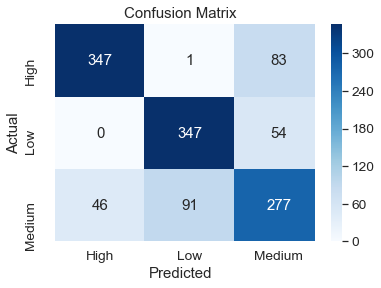

In [50]:
# applying the confusion matrix 
conf_xgb2 = confusion_matrix(y_test, y_pred_xgb2)

# calling the confusion matrix    
conf_matrix(conf_xgb2)

# printing the classification report
print(classification_report(y_test, y_pred_xgb2))

Hyperparameter tuning gives the best  parameters for a best performing model on the train set. But using these parameters causes lower score in the test set. It means that the model with best parameters tend to  overfit on the training set. To avoid further adjusting the parameters, I obtained the closest accuracy  scores on the training and test sets. 

As a result, the accuracy scores on the test sets are around 75-78%. The best performing models are Voting and XGBoost. Their accuracy scores on test set are the highest and the difference between the accuracy scores on train and test set is small.